In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from graph_nets import utils_np
import tensorflow as tf
import pickle

In [3]:
def print_graphs_tuple(graphs_tuple):
    print("Shapes of `GraphsTuple`'s fields:")
    print(graphs_tuple.map(lambda x: x if x is None else x.shape, fields=graphs.ALL_FIELDS))
    print("\nData contained in `GraphsTuple`'s fields:")
    print("globals:\n{}".format(graphs_tuple.globals))
    print("nodes:\n{}".format(graphs_tuple.nodes))
    print("edges:\n{}".format(graphs_tuple.edges))
    print("senders:\n{}".format(graphs_tuple.senders))
    print("receivers:\n{}".format(graphs_tuple.receivers))
    print("n_node:\n{}".format(graphs_tuple.n_node))
    print("n_edge:\n{}".format(graphs_tuple.n_edge))

In [26]:
G = nx.Graph()
G.add_node(0, time='8am',action='Wake up',features=np.random.rand(150,1))
G.add_node(1, time='8:15am',action='Brush',features=np.random.rand(200,1))
G.add_node(2, time='8:30am',action='Workout',features=np.random.rand(150,1))
G.add_node(3, time='8:30am',action='Read news',features=np.random.rand(250,1))
G.add_node(4, time='9am',action='Breakfast',features=np.random.rand(200,1))
G.add_node(5, time='10am',action='Work on project',features=np.random.rand(125,1))
G.add_node(6, time='10am',action='play witcher',features=np.random.rand(250,1))
G.add_node(7, time='12am',action='Sleep',features=np.random.rand(150,1))
G.add_edge(0, 1, weight=1 ,features=np.ones((5,1)))
G.add_edge(1, 2, weight=0.5 ,features=np.ones((5,1)))
G.add_edge(1, 3, weight=0.5 ,features=np.ones((5,1)))
G.add_edge(2, 4, weight=1 ,features=np.ones((5,1)))
G.add_edge(3, 4, weight=1 ,features=np.ones((5,1)))
G.add_edge(4, 5, weight=0.5 ,features=np.ones((5,1)))
G.add_edge(4, 6, weight=0.5 ,features=np.ones((5,1)))
G.add_edge(5, 7, weight=1 ,features=np.ones((5,1)))
G.add_edge(6, 7, weight=1 ,features=np.ones((5,1)))

In [13]:
object_feat_vector=open('object_feat_vector','rb')
object_feat=pickle.load(object_feat_vector)
object_feat_vector.close()
word_feat_vector=open('word_feat_vector','rb')
word_feat=pickle.load(word_feat_vector)
word_feat_vector.close()
emo_feat_vector=open('emo_feat_vector','rb')
emo_feat=pickle.load(emo_feat_vector)
emo_feat_vector.close()

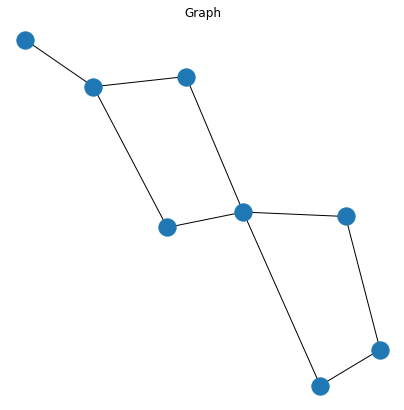

In [31]:
def printGraph(graph):
    ax = plt.figure(figsize=(7, 7)).gca()
    nx.draw(graph, ax=ax)
    ax.set_title("Graph")
printGraph(G)

In [32]:
def printPath(path):
        print('Path:')
        for i in path:
            print(G.nodes[i]['time'],':',G.nodes[i]['action'])
        print('\n')
    
def findAllPaths():
    #returns list of all paths, each path is a list of nodes in order of traversal
    paths=[]
    for path in nx.all_simple_paths(G, source=0, target=7):
        paths.append(path)
#         Uncomment to see all paths
        #printPath(path)
    return(paths)
allPaths=findAllPaths()

In [33]:
import dgl
import torch
g = dgl.DGLGraph(G)

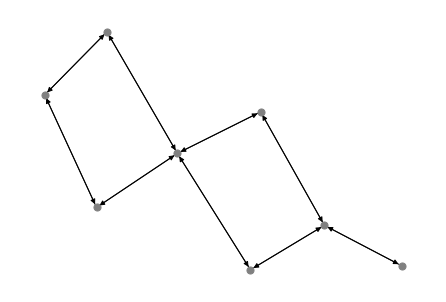

In [34]:
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), node_size=50, node_color=[[.5, .5, .5,]])
plt.show()

In [35]:
g.ndata['pv'] = torch.ones(8) / 8
g.ndata['deg'] = g.out_degrees(g.nodes()).float()
def pagerank_message_func(edges):
    return {'pv' : edges.src['pv'] / edges.src['deg']}
def pagerank_reduce_func(nodes):
    msgs = torch.sum(nodes.mailbox['pv'], dim=1)
    pv = msgs
    return {'pv' : pv}
g.register_message_func(pagerank_message_func)
g.register_reduce_func(pagerank_reduce_func)
def pagerank_naive(g):
    # Phase #1: send out messages along all edges.
    for u, v in zip(*g.edges()):
        g.send((u, v))
    # Phase #2: receive messages to compute new PageRank values.
    for v in g.nodes():
        g.recv(v)
pagerank_naive(g)

In [36]:
print(g.ndata['pv'])

tensor([0.0417, 0.2500, 0.0729, 0.0729, 0.2500, 0.0938, 0.0938, 0.1250])


In [40]:
for i in range(100):
    pagerank_naive(g)
    print(g.ndata['pv'])

tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1389, 0.1389, 0.0833])
tensor([0.0417, 0.2083, 0.0833, 0.0833, 0.2778, 0.0833, 0.0833, 0.1389])
tensor([0.0694, 0.1250, 0.1389, 0.1389, 0.1667, 0.1

In [10]:
def makeGraphTuple():
    graphs_tuple = utils_np.networkxs_to_graphs_tuple([G])
    print_graphs_tuple(graphs_tuple)
    return graphs_tuple
#makeGraphTuple()

In [11]:
local = nx.OrderedMultiDiGraph()
def makeNode(time,action,vector,ID):
    #function to make and connect nodes in the local graph
    #features in the following add node function takes in the big vector,give embeddings,time,state  
    #seperately if you think it'll be convenient to access them
    #one single vector as features is required to make the graph tuple
    prevID=ID-1
    local.add_node(ID, time=time,action=action,features=np.array(vector))
    if(prevID != -1):
        local.add_edge(prevID, ID, weight=0 ,features=np.array([0.3, 1.3]))

In [12]:
#call make node on state change,give in embeddings as parameters,combine them in the makeNode function
makeNode('8:00 AM','Wake up',[1,1],0)
makeNode('9:00 AM','Breakfast',[1,1],1)
makeNode('10:00 AM','Work on Irina',[1,1],2)
makeNode('12:00 AM','Sleep',[1,1],3)

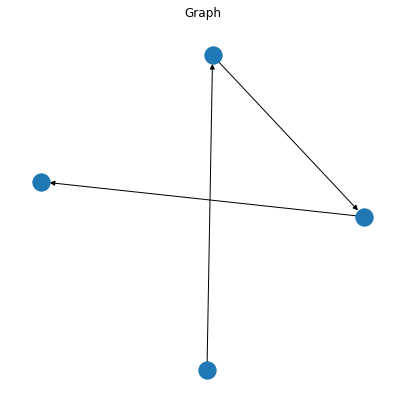

In [13]:
printGraph(local)